In [81]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [82]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data = pd.read_csv("test.csv")
test_data.head()

In [84]:
women = train_data.loc[train_data['Sex'] == 'female']['Survived'] # train_data.Sex also true
rate_women = women.sum() / len(women) # sum(women) also true

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [85]:
men = train_data.loc[train_data['Sex'] == 'male']['Survived'] # train_data.Sex also true
rate_men = men.sum() / len(men) # sum(men) also true

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [86]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [87]:
df = pd.read_csv("submission.csv")
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [88]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
train_data.loc[train_data["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [90]:
train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
test_data["Age"].fillna(test_data["Age"].median(), inplace=True)
# train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())
# inplace=True: Değişiklik orijinal veri çerçevesinde yapılır.
# inplace=False: Yeni bir kopya oluşturulur ve manuel olarak atama yapmanız gerekir.
# Not: inplace=True kullanımı bazı yeni pandas sürümlerinde önerilmiyor çünkü bellek yönetimi açısından daha az verimli olabilir. Bunun yerine değişikliği yeni bir değişkene atamak genellikle daha güvenlidir.

C:\Users\aFurkan\AppData\Local\Temp\ipykernel_10392\231946391.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
C:\Users\aFurkan\AppData\Local\Temp\ipykernel_10392\231946391.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [91]:
train_data['Cabin'].fillna('U', inplace=True)
test_data['Cabin'].fillna('U', inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


C:\Users\aFurkan\AppData\Local\Temp\ipykernel_10392\4251296158.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Cabin'].fillna('U', inplace=True)
C:\Users\aFurkan\AppData\Local\Temp\ipykernel_10392\4251296158.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [92]:
train_data["CabinLetter"] = train_data["Cabin"].apply(lambda x: x[0])
test_data["CabinLetter"] = test_data["Cabin"].apply(lambda x: x[0])
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinLetter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,U


In [93]:
test_data["Fare"].fillna(test_data["Fare"].mode()[0], inplace=True)

C:\Users\aFurkan\AppData\Local\Temp\ipykernel_10392\4167001425.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data["Fare"].fillna(test_data["Fare"].mode()[0], inplace=True)


In [94]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  CabinLetter  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


C:\Users\aFurkan\AppData\Local\Temp\ipykernel_10392\1543123453.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
C:\Users\aFurkan\AppData\Local\Temp\ipykernel_10392\1543123453.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

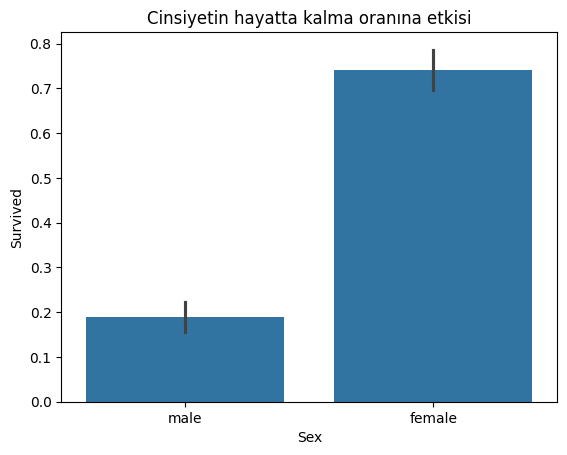

In [96]:
sns.barplot(x='Sex',y='Survived',data=train_data)
plt.title("Cinsiyetin hayatta kalma oranına etkisi")
plt.show()

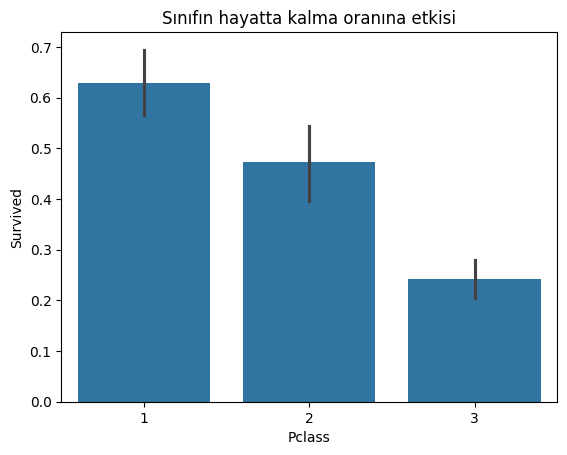

In [97]:
sns.barplot(x='Pclass',y='Survived',data=train_data)
plt.title('Sınıfın hayatta kalma oranına etkisi')
plt.show()

### Kategorik verileri sayısallaştırma

In [98]:
train_data['Sex'] = train_data['Sex'].map({'male':0, 'female':1})
test_data['Sex'] = test_data['Sex'].map({'male':0, 'female':1})
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinLetter
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,S,U


In [99]:
train_data['Embarked'].unique()
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,CabinLetter,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,U,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,U,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,C,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,U,False,True


In [100]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,CabinLetter,Embarked_Q,Embarked_S,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,U,False,True,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,False,False,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,U,False,True,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,C,False,True,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,U,False,True,1


In [101]:
train_data["Title"] = train_data["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

# Az bulunan unvanları "Rare" olarak gruplayalım
train_data["Title"] = train_data["Title"].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 
                                   'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_data["Title"] = train_data["Title"].replace(["Mlle", "Ms"], "Miss")
train_data["Title"] = train_data["Title"].replace("Mme", "Mrs")
# Title sütununu sayısallaştırma
train_data = pd.get_dummies(train_data, columns=["Title"], drop_first=True)
train_data.head()

test_data["Title"] = test_data["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

# Az bulunan unvanları "Rare" olarak gruplayalım
test_data["Title"] = test_data["Title"].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 
                                   'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_data["Title"] = test_data["Title"].replace(["Mlle", "Ms"], "Miss")
test_data["Title"] = test_data["Title"].replace("Mme", "Mrs")
# Title sütununu sayısallaştırma
test_data = pd.get_dummies(test_data, columns=["Title"], drop_first=True)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,CabinLetter,Embarked_Q,Embarked_S,FamilySize,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,U,U,True,False,1,False,True,False,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,U,U,False,True,2,False,False,True,False
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,U,U,True,False,1,False,True,False,False
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,U,U,False,True,1,False,True,False,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,U,U,False,True,3,False,False,True,False


In [ ]:
train_data.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)
test_data.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,CabinLetter,Embarked_Q,Embarked_S,FamilySize,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,22.0,1,0,7.2500,U,False,True,2,False,True,False,False
1,1,1,1,38.0,1,0,71.2833,C,False,False,2,False,False,True,False
2,1,3,1,26.0,0,0,7.9250,U,False,True,1,True,False,False,False
3,1,1,1,35.0,1,0,53.1000,C,False,True,2,False,False,True,False
4,0,3,0,35.0,0,0,8.0500,U,False,True,1,False,True,False,False


In [103]:
train_data["IsAlone"] = (train_data["FamilySize"] == 1).astype(int)
test_data["IsAlone"] = (test_data["FamilySize"] == 1).astype(int)

In [104]:
train_data["Fare"] = np.log1p(train_data["Fare"]) 
test_data["Fare"] = np.log1p(test_data["Fare"]) 

In [105]:
train_data = pd.get_dummies(train_data, columns=["CabinLetter"], drop_first=True)
test_data = pd.get_dummies(test_data, columns=["CabinLetter"], drop_first=True)

In [106]:
train_data["Pclass_Fare"] = train_data["Pclass"] * train_data["Fare"]
test_data["Pclass_Fare"] = test_data["Pclass"] * test_data["Fare"]

In [107]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,...,IsAlone,CabinLetter_B,CabinLetter_C,CabinLetter_D,CabinLetter_E,CabinLetter_F,CabinLetter_G,CabinLetter_T,CabinLetter_U,Pclass_Fare
0,0,3,0,22.0,1,0,2.110213,False,True,2,...,0,False,False,False,False,False,False,False,True,6.330640
1,1,1,1,38.0,1,0,4.280593,False,False,2,...,0,False,True,False,False,False,False,False,False,4.280593
2,1,3,1,26.0,0,0,2.188856,False,True,1,...,1,False,False,False,False,False,False,False,True,6.566569
3,1,1,1,35.0,1,0,3.990834,False,True,2,...,0,False,True,False,False,False,False,False,False,3.990834
4,0,3,0,35.0,0,0,2.202765,False,True,1,...,1,False,False,False,False,False,False,False,True,6.608294


In [108]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,Title_Miss,...,Title_Rare,IsAlone,CabinLetter_B,CabinLetter_C,CabinLetter_D,CabinLetter_E,CabinLetter_F,CabinLetter_G,CabinLetter_U,Pclass_Fare
0,3,0,34.5,0,0,2.178064,True,False,1,False,...,False,1,False,False,False,False,False,False,True,6.534193
1,3,1,47.0,1,0,2.079442,False,True,2,False,...,False,0,False,False,False,False,False,False,True,6.238325
2,2,0,62.0,0,0,2.369075,True,False,1,False,...,False,1,False,False,False,False,False,False,True,4.738150
3,3,0,27.0,0,0,2.268252,False,True,1,False,...,False,1,False,False,False,False,False,False,True,6.804757
4,3,1,22.0,1,1,2.586824,False,True,3,False,...,False,0,False,False,False,False,False,False,True,7.760471


In [109]:
from sklearn.model_selection import train_test_split

# Train verisini X ve y olarak ayır
X_train = train_data.drop(columns=["Survived"])
y_train = train_data["Survived"]

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Test verisini X olarak ayır (çünkü "Survived" sütunu yok)
X_test = test_data.copy()
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
# Eğitim setini daha küçük bir doğrulama setiyle test etmek için bölebiliriz
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Modeli oluştur
model = LogisticRegression(max_iter=200)

# Modeli eğit
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred = model.predict(X_valid)

# Modelin doğruluk oranını hesapla
accuracy = accuracy_score(y_valid, y_pred)
print(f"Lojistik Regresyon Doğruluk Oranı: {accuracy:.4f}")


Lojistik Regresyon Doğruluk Oranı: 0.8156


c:\Users\aFurkan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
# Random Forest modelini oluştur
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğit
rf_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred_rf = rf_model.predict(X_valid)

# Doğruluk oranını hesapla
accuracy_rf = accuracy_score(y_valid, y_pred_rf)
print(f"Random Forest Doğruluk Oranı: {accuracy_rf:.4f}")

Random Forest Doğruluk Oranı: 0.8212


In [ ]:
final_predictions = model.predict(X_test)
# Tahmin sonuçlarını CSV dosyası olarak kaydetme
submission = pd.DataFrame({"PassengerId": test_data["PassengerId"], "Survived": final_predictions})
submission.to_csv("submission.csv", index=False)
